<a href="https://colab.research.google.com/github/LucasColas/Machine-Learning-APS-Failure-at-Scania-Trucks/blob/main/Machine_Learning_Scania_Trucks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Implementation of KMeans

## Goal : 
Our goal is to minimize the cost associated with:

1) Unnecessary checks done by mechanic.

2) Missing a faulty truck, which may cause breakdown.

## Libraries

In [66]:
#Data analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from sklearn.decomposition import PCA
from sklearn import preprocessing
#Algorithms
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
#Metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import silhouette_samples, silhouette_score


from imblearn.over_sampling import SMOTE
from collections import Counter

## Preparation

This database contains the component measurements for the APS of Scania trucks. 

In [67]:
from google.colab import drive 
drive.mount('/content/drive') #My dataset is in my Google Drive 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [68]:
Dataset_training = pd.read_csv('/content/drive/My Drive/Machine Learning/aps_failure_training_set.csv', na_values="na") 


In [69]:
Dataset_test = pd.read_csv('/content/drive/My Drive/Machine Learning/aps_failure_test_set.csv', na_values="na") 


In [70]:
Dataset_training.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,NaN,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,neg,33058,NaN,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,neg,41040,NaN,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,neg,12,0.0,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,neg,60874,NaN,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0


In [71]:
Dataset_training #Dataset

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,NaN,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,neg,33058,NaN,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,neg,41040,NaN,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,neg,12,0.0,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,neg,60874,NaN,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,neg,153002,NaN,6.640000e+02,186.0,0.0,0.0,0.0,0.0,0.0,...,998500.0,566884.0,1290398.0,1218244.0,1019768.0,717762.0,898642.0,28588.0,0.0,0.0
59996,neg,2286,NaN,2.130707e+09,224.0,0.0,0.0,0.0,0.0,0.0,...,10578.0,6760.0,21126.0,68424.0,136.0,0.0,0.0,0.0,0.0,0.0
59997,neg,112,0.0,2.130706e+09,18.0,0.0,0.0,0.0,0.0,0.0,...,792.0,386.0,452.0,144.0,146.0,2622.0,0.0,0.0,0.0,0.0
59998,neg,80292,NaN,2.130706e+09,494.0,0.0,0.0,0.0,0.0,0.0,...,699352.0,222654.0,347378.0,225724.0,194440.0,165070.0,802280.0,388422.0,0.0,0.0


### Training Dataset

#### Handling Missing Values

In [72]:
Dataset_training.isnull().sum()

class         0
aa_000        0
ab_000    46329
ac_000     3335
ad_000    14861
          ...  
ee_007      671
ee_008      671
ee_009      671
ef_000     2724
eg_000     2723
Length: 171, dtype: int64

In [73]:
Dataset_training.isnull().sum().max()

49264

In [74]:
X = Dataset_training.copy()

First, let's try to drop every row with a nan value.

In [75]:
X.dropna() #We lose to much data

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
16,neg,31300,0.0,784.0,740.0,0.0,0.0,0.0,0.0,0.0,...,798872.0,112724.0,51736.0,7054.0,6628.0,27600.0,2.0,2.0,0.0,0.0
179,neg,97000,0.0,378.0,160.0,0.0,0.0,0.0,0.0,0.0,...,1078982.0,313334.0,511330.0,552328.0,871528.0,871104.0,1980.0,42.0,0.0,0.0
225,neg,124656,2.0,278.0,170.0,0.0,0.0,0.0,0.0,0.0,...,1205696.0,866148.0,697610.0,700400.0,1900386.0,437532.0,3680.0,0.0,0.0,0.0
394,pos,281324,2.0,3762.0,2346.0,0.0,0.0,4808.0,215720.0,967572.0,...,624606.0,269976.0,638838.0,1358354.0,819918.0,262804.0,2824.0,0.0,0.0,0.0
413,pos,43482,0.0,1534.0,1388.0,0.0,0.0,0.0,0.0,40024.0,...,497196.0,121166.0,202272.0,232636.0,645690.0,50.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59432,neg,118028,0.0,740.0,714.0,618.0,690.0,0.0,0.0,0.0,...,838952.0,631338.0,541036.0,1285274.0,1832658.0,165838.0,3022.0,0.0,0.0,0.0
59562,neg,229916,0.0,616.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59843,neg,224084,0.0,912.0,766.0,0.0,0.0,0.0,0.0,0.0,...,413576.0,209524.0,469894.0,2233992.0,5933084.0,364450.0,12422.0,0.0,0.0,0.0
59870,neg,197332,0.0,658.0,616.0,216.0,346.0,0.0,0.0,0.0,...,73940.0,49896.0,90454.0,575264.0,104600.0,10352.0,36.0,0.0,0.0,0.0


In [76]:
X = Dataset_training.copy() #Let's do another copy

In [77]:
X['ab_000'] = X['ab_000'].replace(np.NaN, X['ab_000'].mean()) 

In [78]:
X['ab_000'] #Too much values replaced by the mean

0        0.713189
1        0.713189
2        0.713189
3        0.000000
4        0.713189
           ...   
59995    0.713189
59996    0.713189
59997    0.000000
59998    0.713189
59999    0.713189
Name: ab_000, Length: 60000, dtype: float64

In [79]:
X = X.drop(['ab_000'], axis=1) #it's better to drop it

In [80]:
X

,class,aa_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,neg,33058,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,neg,41040,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,neg,12,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,318.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,neg,60874,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,neg,153002,6.640000e+02,186.0,0.0,0.0,0.0,0.0,0.0,2564.0,...,998500.0,566884.0,1290398.0,1218244.0,1019768.0,717762.0,898642.0,28588.0,0.0,0.0
59996,neg,2286,2.130707e+09,224.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10578.0,6760.0,21126.0,68424.0,136.0,0.0,0.0,0.0,0.0,0.0
59997,neg,112,2.130706e+09,18.0,0.0,0.0,0.0,0.0,0.0,0.0,...,792.0,386.0,452.0,144.0,146.0,2622.0,0.0,0.0,0.0,0.0
59998,neg,80292,2.130706e+09,494.0,0.0,0.0,0.0,0.0,0.0,0.0,...,699352.0,222654.0,347378.0,225724.0,194440.0,165070.0,802280.0,388422.0,0.0,0.0


Other drops

In [81]:
X.isnull().sum()

class         0
aa_000        0
ac_000     3335
ad_000    14861
ae_000     2500
          ...  
ee_007      671
ee_008      671
ee_009      671
ef_000     2724
eg_000     2723
Length: 170, dtype: int64

In [82]:
X = X.drop(['ad_000'], axis=1)

In [83]:
X = X.drop(['br_000'], axis=1)

In [84]:
X

,class,aa_000,ac_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,2.130706e+09,0.0,0.0,0.0,0.0,0.0,0.0,37250.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,neg,33058,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,18254.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,neg,41040,2.280000e+02,0.0,0.0,0.0,0.0,0.0,0.0,1648.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,neg,12,7.000000e+01,0.0,10.0,0.0,0.0,0.0,318.0,2212.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,neg,60874,1.368000e+03,0.0,0.0,0.0,0.0,0.0,0.0,43752.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,neg,153002,6.640000e+02,0.0,0.0,0.0,0.0,0.0,2564.0,59100.0,...,998500.0,566884.0,1290398.0,1218244.0,1019768.0,717762.0,898642.0,28588.0,0.0,0.0
59996,neg,2286,2.130707e+09,0.0,0.0,0.0,0.0,0.0,0.0,104.0,...,10578.0,6760.0,21126.0,68424.0,136.0,0.0,0.0,0.0,0.0,0.0
59997,neg,112,2.130706e+09,0.0,0.0,0.0,0.0,0.0,0.0,28.0,...,792.0,386.0,452.0,144.0,146.0,2622.0,0.0,0.0,0.0,0.0
59998,neg,80292,2.130706e+09,0.0,0.0,0.0,0.0,0.0,0.0,330.0,...,699352.0,222654.0,347378.0,225724.0,194440.0,165070.0,802280.0,388422.0,0.0,0.0


In [85]:
X = X.drop(['bq_000'], axis=1)

In [86]:
X.count().idxmin()

'bp_000'

In [87]:
X['bp_000'].isnull().sum()

47740

In [88]:
X.isnull().sum()

class        0
aa_000       0
ac_000    3335
ae_000    2500
af_000    2500
          ... 
ee_007     671
ee_008     671
ee_009     671
ef_000    2724
eg_000    2723
Length: 167, dtype: int64

Drop every column that has more than 10% percent of NaN values.

In [89]:
nulls = X.isnull().sum().to_frame()
Nan_Values = {index:row[0] for index, row in nulls.iterrows()}

In [90]:
X.shape[0]

60000

In [91]:
for col, value in Nan_Values.items():
  if value >= 0.1*X.shape[0]:
    X = X.drop([col], axis=1)

Replace Nan Values with the mean of a column.

In [92]:
nulls = X.isnull().sum().to_frame()
Nan_Values2 = {index:row[0] for index, row in nulls.iterrows()}

In [93]:
Nan_Values2

{'class': 0,
 'aa_000': 0,
 'ac_000': 3335,
 'ae_000': 2500,
 'af_000': 2500,
 'ag_000': 671,
 'ag_001': 671,
 'ag_002': 671,
 'ag_003': 671,
 'ag_004': 671,
 'ag_005': 671,
 'ag_006': 671,
 'ag_007': 671,
 'ag_008': 671,
 'ag_009': 671,
 'ah_000': 645,
 'ai_000': 629,
 'aj_000': 629,
 'ak_000': 4400,
 'al_000': 642,
 'am_0': 629,
 'an_000': 642,
 'ao_000': 589,
 'ap_000': 642,
 'aq_000': 589,
 'ar_000': 2723,
 'as_000': 629,
 'at_000': 629,
 'au_000': 629,
 'av_000': 2500,
 'ax_000': 2501,
 'ay_000': 671,
 'ay_001': 671,
 'ay_002': 671,
 'ay_003': 671,
 'ay_004': 671,
 'ay_005': 671,
 'ay_006': 671,
 'ay_007': 671,
 'ay_008': 671,
 'ay_009': 671,
 'az_000': 671,
 'az_001': 671,
 'az_002': 671,
 'az_003': 671,
 'az_004': 671,
 'az_005': 671,
 'az_006': 671,
 'az_007': 671,
 'az_008': 671,
 'az_009': 671,
 'ba_000': 688,
 'ba_001': 688,
 'ba_002': 688,
 'ba_003': 688,
 'ba_004': 688,
 'ba_005': 688,
 'ba_006': 688,
 'ba_007': 688,
 'ba_008': 688,
 'ba_009': 688,
 'bb_000': 645,
 'bc_000

In [94]:
#X['ab_000'] = X['ab_000'].replace(np.NaN, X['ab_000'].mean())
for col, value in Nan_Values2.items():
  if value > 0:
    X[col] = X[col].replace(np.NaN, X[col].mean())

In [95]:
X.isnull().sum().max()

0

In [96]:
X

,class,aa_000,ac_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,2.130706e+09,0.0,0.0,0.0,0.0,0.0,0.0,37250.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,neg,33058,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,18254.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,neg,41040,2.280000e+02,0.0,0.0,0.0,0.0,0.0,0.0,1648.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,neg,12,7.000000e+01,0.0,10.0,0.0,0.0,0.0,318.0,2212.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,neg,60874,1.368000e+03,0.0,0.0,0.0,0.0,0.0,0.0,43752.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,neg,153002,6.640000e+02,0.0,0.0,0.0,0.0,0.0,2564.0,59100.0,...,998500.0,566884.0,1290398.0,1218244.0,1019768.0,717762.0,898642.0,28588.0,0.0,0.0
59996,neg,2286,2.130707e+09,0.0,0.0,0.0,0.0,0.0,0.0,104.0,...,10578.0,6760.0,21126.0,68424.0,136.0,0.0,0.0,0.0,0.0,0.0
59997,neg,112,2.130706e+09,0.0,0.0,0.0,0.0,0.0,0.0,28.0,...,792.0,386.0,452.0,144.0,146.0,2622.0,0.0,0.0,0.0,0.0
59998,neg,80292,2.130706e+09,0.0,0.0,0.0,0.0,0.0,0.0,330.0,...,699352.0,222654.0,347378.0,225724.0,194440.0,165070.0,802280.0,388422.0,0.0,0.0


In [97]:
Y = X[['class']]

In [98]:
Y

,class
0,neg
1,neg
2,neg
3,neg
4,neg
...,...
59995,neg
59996,neg
59997,neg
59998,neg


In [99]:
Y['class'].replace(['neg', 'pos'], [0,1], inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [100]:
Y

,class
0,0
1,0
2,0
3,0
4,0
...,...
59995,0
59996,0
59997,0
59998,0


In [101]:
Y['class'].value_counts() 

0    59000
1     1000
Name: class, dtype: int64

In [102]:
X = X.drop(['class'], axis=1)

In [103]:
Y

,class
0,0
1,0
2,0
3,0
4,0
...,...
59995,0
59996,0
59997,0
59998,0


### Inference

In [104]:
Dataset_test['class'].value_counts()


neg    15625
pos      375
Name: class, dtype: int64

In [105]:
Dataset_test

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,60,0.0,2.000000e+01,12.0,0.0,0.0,0.0,0.0,0.0,...,1098.0,138.0,412.0,654.0,78.0,88.0,0.0,0.0,0.0,0.0
1,neg,82,0.0,6.800000e+01,40.0,0.0,0.0,0.0,0.0,0.0,...,1068.0,276.0,1620.0,116.0,86.0,462.0,0.0,0.0,0.0,0.0
2,neg,66002,2.0,2.120000e+02,112.0,0.0,0.0,0.0,0.0,0.0,...,495076.0,380368.0,440134.0,269556.0,1315022.0,153680.0,516.0,0.0,0.0,0.0
3,neg,59816,NaN,1.010000e+03,936.0,0.0,0.0,0.0,0.0,0.0,...,540820.0,243270.0,483302.0,485332.0,431376.0,210074.0,281662.0,3232.0,0.0,0.0
4,neg,1814,NaN,1.560000e+02,140.0,0.0,0.0,0.0,0.0,0.0,...,7646.0,4144.0,18466.0,49782.0,3176.0,482.0,76.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,neg,81852,NaN,2.130706e+09,892.0,0.0,0.0,0.0,0.0,0.0,...,632658.0,273242.0,510354.0,373918.0,349840.0,317840.0,960024.0,25566.0,0.0,0.0
15996,neg,18,0.0,5.200000e+01,46.0,8.0,26.0,0.0,0.0,0.0,...,266.0,44.0,46.0,14.0,2.0,0.0,0.0,0.0,0.0,0.0
15997,neg,79636,NaN,1.670000e+03,1518.0,0.0,0.0,0.0,0.0,0.0,...,806832.0,449962.0,778826.0,581558.0,375498.0,222866.0,358934.0,19548.0,0.0,0.0
15998,neg,110,NaN,3.600000e+01,32.0,0.0,0.0,0.0,0.0,0.0,...,588.0,210.0,180.0,544.0,1004.0,1338.0,74.0,0.0,0.0,0.0


In [106]:
Dataset_test.describe()

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
count,1.600000e+04,3637.000000,1.507400e+04,12019.000000,15310.000000,15310.000000,15811.000000,1.581100e+04,1.581100e+04,1.581100e+04,...,1.580800e+04,1.580800e+04,1.580800e+04,1.580800e+04,1.580800e+04,1.580800e+04,1.580800e+04,1.580800e+04,15238.000000,15238.000000
mean,6.799698e+04,0.772065,3.580393e+08,439.498794,6.428347,10.195950,120.858516,2.064204e+03,1.379236e+04,1.126276e+05,...,4.649135e+05,2.212010e+05,4.690886e+05,4.256696e+05,3.559239e+05,3.524014e+05,1.442759e+05,8.560355e+03,0.064969,0.242683
std,5.035350e+05,2.589224,7.966968e+08,1551.328109,118.186469,167.260463,6454.660300,8.925778e+04,2.358405e+05,1.025843e+06,...,1.255197e+06,5.828691e+05,1.267550e+06,1.259560e+06,1.199544e+06,1.628545e+06,5.368225e+05,5.329946e+04,3.374657,14.339059
min,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,9.280000e+02,0.000000,1.600000e+01,26.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,...,3.178000e+03,1.256000e+03,2.883500e+03,3.869500e+03,6.100000e+02,1.240000e+02,0.000000e+00,0.000000e+00,0.000000,0.000000
50%,3.098200e+04,0.000000,1.590000e+02,130.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,...,2.409860e+05,1.147800e+05,2.297080e+05,1.956510e+05,9.657000e+04,4.201300e+04,3.985000e+03,0.000000e+00,0.000000,0.000000
75%,4.947900e+04,0.000000,1.003500e+03,430.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,...,4.391320e+05,2.189510e+05,4.714860e+05,4.034105e+05,2.790355e+05,1.699100e+05,1.389310e+05,1.907000e+03,0.000000,0.000000
max,4.294967e+07,58.000000,2.130707e+09,87038.000000,11044.000000,14186.000000,736174.000000,1.047252e+07,1.914916e+07,7.305747e+07,...,5.382333e+07,2.207969e+07,4.859750e+07,5.604348e+07,4.215944e+07,4.747137e+07,1.718575e+07,4.570398e+06,340.000000,1720.000000


In [107]:
Y_test = Dataset_test[['class']]

In [108]:
Y_test

,class
0,neg
1,neg
2,neg
3,neg
4,neg
...,...
15995,neg
15996,neg
15997,neg
15998,neg


In [109]:
X_test = Dataset_test.drop(['class'], axis=1)

In [110]:
X_test.columns

Index(['aa_000', 'ab_000', 'ac_000', 'ad_000', 'ae_000', 'af_000', 'ag_000',
       'ag_001', 'ag_002', 'ag_003',
       ...
       'ee_002', 'ee_003', 'ee_004', 'ee_005', 'ee_006', 'ee_007', 'ee_008',
       'ee_009', 'ef_000', 'eg_000'],
      dtype='object', length=170)

In [111]:
for col in X_test.columns:
  if col not in X.columns:
    X_test = X_test.drop([col], axis=1)
  else:
    X_test[col] = X_test[col].replace(np.NaN, X_test[col].mean())


In [112]:
X_test

,aa_000,ac_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,ag_005,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,60,2.000000e+01,0.0,0.0,0.0,0.0,0.0,2682.0,4736.0,3862.0,...,1098.0,138.0,412.0,654.0,78.0,88.0,0.0,0.0,0.0,0.0
1,82,6.800000e+01,0.0,0.0,0.0,0.0,0.0,0.0,748.0,12594.0,...,1068.0,276.0,1620.0,116.0,86.0,462.0,0.0,0.0,0.0,0.0
2,66002,2.120000e+02,0.0,0.0,0.0,0.0,0.0,199486.0,1358536.0,1952422.0,...,495076.0,380368.0,440134.0,269556.0,1315022.0,153680.0,516.0,0.0,0.0,0.0
3,59816,1.010000e+03,0.0,0.0,0.0,0.0,0.0,0.0,123922.0,984314.0,...,540820.0,243270.0,483302.0,485332.0,431376.0,210074.0,281662.0,3232.0,0.0,0.0
4,1814,1.560000e+02,0.0,0.0,0.0,0.0,0.0,0.0,72.0,17926.0,...,7646.0,4144.0,18466.0,49782.0,3176.0,482.0,76.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,81852,2.130706e+09,0.0,0.0,0.0,0.0,0.0,0.0,5486.0,704012.0,...,632658.0,273242.0,510354.0,373918.0,349840.0,317840.0,960024.0,25566.0,0.0,0.0
15996,18,5.200000e+01,8.0,26.0,0.0,0.0,0.0,0.0,6444.0,3308.0,...,266.0,44.0,46.0,14.0,2.0,0.0,0.0,0.0,0.0,0.0
15997,79636,1.670000e+03,0.0,0.0,0.0,0.0,0.0,0.0,15062.0,1991298.0,...,806832.0,449962.0,778826.0,581558.0,375498.0,222866.0,358934.0,19548.0,0.0,0.0
15998,110,3.600000e+01,0.0,0.0,0.0,0.0,0.0,0.0,198.0,3730.0,...,588.0,210.0,180.0,544.0,1004.0,1338.0,74.0,0.0,0.0,0.0


Convert a DataFrame to a NumPy array.

In [113]:
X = X.to_numpy()

In [114]:
Y = Y.to_numpy()

In [115]:
X_test = X_test.to_numpy()

In [116]:
X_test.shape

(16000, 142)

In [117]:
X_test.shape

(16000, 142)

In [118]:
Y_test['class'].replace(['neg', 'pos'], [0,1], inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [119]:
Y_test = Y_test.to_numpy()

## PCA

#### 2 Principal Components

In [120]:
scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X)

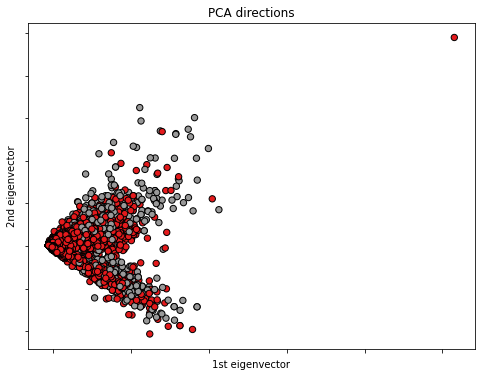

In [121]:

fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot()

X_reduced = PCA(n_components=2).fit_transform(X)
ax.scatter(
    X_reduced[:, 0],
    X_reduced[:, 1],
    c=Y,
    cmap=plt.cm.Set1,
    edgecolor="k",
    s=40,
)

ax.set_title("PCA directions")
ax.set_xlabel("1st eigenvector")
ax.xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.yaxis.set_ticklabels([])

plt.show()

#### 3 PCA

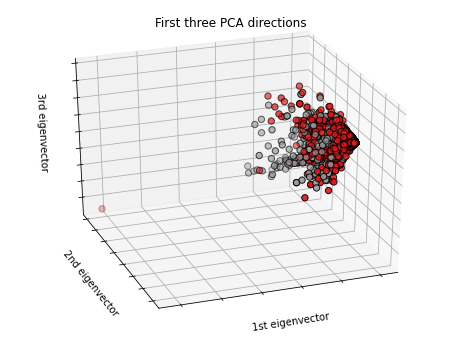

In [122]:
fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d", elev=-150, azim=110)

X_reduced = PCA(n_components=3).fit_transform(X)
ax.scatter(
    X_reduced[:, 0],
    X_reduced[:, 1],
    X_reduced[:, 2],
    c=Y,
    cmap=plt.cm.Set1,
    edgecolor="k",
    s=40,
)

ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.zaxis.set_ticklabels([])

plt.show()

#### Optimum

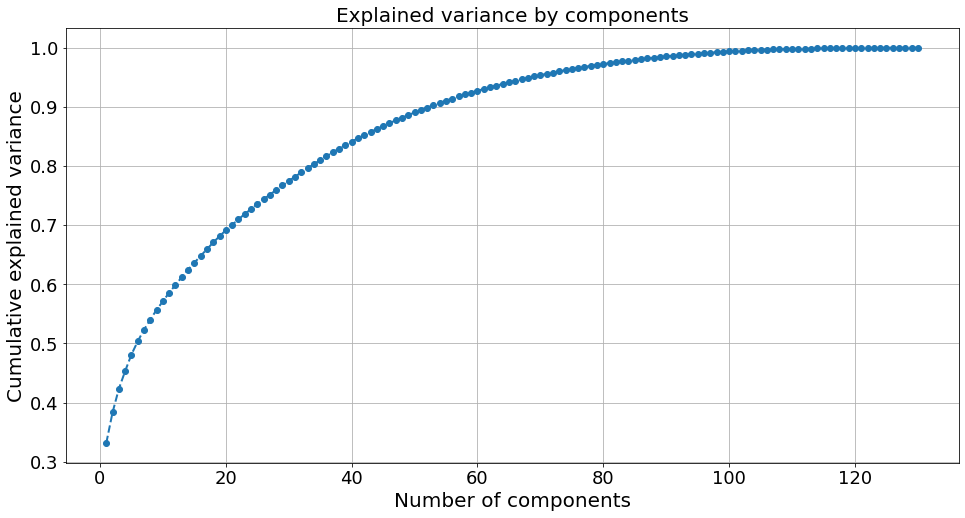

In [123]:
pca = PCA()
pca.fit(X)
cumsum_var = pca.explained_variance_ratio_.cumsum()

plt.figure(figsize = (16,8))
plt.plot(range(1,131), cumsum_var[0:130], marker='o', ls='--', lw=2)
plt.grid()
plt.xlabel("Number of components",fontsize=20)
plt.ylabel("Cumulative explained variance",fontsize=20)
plt.title("Explained variance by components",fontsize=20)
plt.tick_params(axis='x', labelsize=18)
plt.tick_params(axis='y', labelsize=18)

In [124]:

pca_50 = PCA(n_components = 50)
pca_50.fit(X)

Xpca = pca_50.transform(X)
print(Xpca.shape)

(60000, 50)


## PCA with 50 components

### KMeans

processing number of clusters k = 2
processing number of clusters k = 3
processing number of clusters k = 4
processing number of clusters k = 5
processing number of clusters k = 6
processing number of clusters k = 7
processing number of clusters k = 8
processing number of clusters k = 9
processing number of clusters k = 10


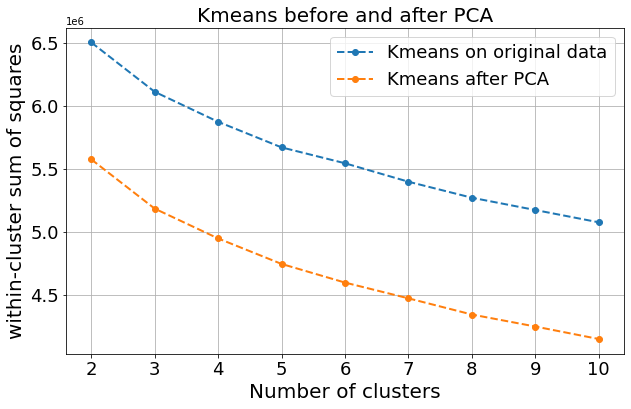

In [125]:
from sklearn.cluster import KMeans


WCCS_original = []
WCCS_pca = []

for k in range(2,11):
    print('processing number of clusters k =', k)
    # Kmeans on original data :
    kmeans_original = KMeans(n_clusters = k, init = 'k-means++', random_state = 10)
    kmeans_original.fit(X)
    WCCS_original.append(kmeans_original.inertia_)
    # Kmeans after PCA :
    kmeans_pca = KMeans(n_clusters = k, init = 'k-means++', random_state = 10)
    kmeans_pca.fit(Xpca)
    WCCS_pca.append(kmeans_pca.inertia_)
 

plt.figure(figsize = (10,6))
plt.plot(range(2,11),WCCS_original, marker='o', ls='--', lw=2, label='Kmeans on original data')
plt.plot(range(2,11),WCCS_pca, marker='o', ls='--', lw=2, label='Kmeans after PCA')
plt.grid()
plt.xlabel("Number of clusters", fontsize=20)
plt.ylabel("within-cluster sum of squares", fontsize=20)
plt.title("Kmeans before and after PCA",fontsize=20)
plt.tick_params(axis='x', labelsize=18)
plt.tick_params(axis='y', labelsize=18)
plt.legend(fontsize=18, loc='upper right')


### Comparison of different clustering algorithms

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import SpectralClustering
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import Birch
from sklearn.mixture import GaussianMixture

np.random.seed(407)

stock_silhouette_kmeans = []
stock_silhouette_spectral = []
stock_silhouette_Birch = []
stock_silhouette_GaussianMixture = []
stock_silhouette_Ward = []

for K in np.arange(2,11):
    print('processing number of clusters K =', K)
    # Kmeans : 
    kmeans_pca = KMeans(n_clusters = K, init = 'k-means++', random_state = 10)
    kmeans_pca.fit(Xpca)
    stock_silhouette_kmeans.append(silhouette_score(Xpca, kmeans_pca.labels_))
    """
    # Spectral Clustering : 
    spectral = SpectralClustering(n_clusters=K, eigen_solver="arpack", affinity="nearest_neighbors")
    spectral.fit(X)
    stock_silhouette_spectral.append(silhouette_score(X, spectral.labels_))
    # Ward : 
    ward = AgglomerativeClustering(n_clusters=K, linkage="ward")
    ward.fit(X)
    stock_silhouette_Ward.append(silhouette_score(X, ward.labels_))
    # Birch 
    birch = Birch(n_clusters=K)
    birch.fit(X)
    stock_silhouette_Birch.append(silhouette_score(X, birch.labels_))
    # Mixture Gaussian
    gmm = GaussianMixture(n_components=K, covariance_type="diag")
    gmm.fit(Xpca)
    gmm_labels = gmm.predict(Xpca)
    stock_silhouette_GaussianMixture.append(silhouette_score(Xpca, gmm_labels))
    """

    
figSilhouette = plt.figure(figsize=(8,4))
ax1 = figSilhouette.add_subplot(1,1,1)
ax1.plot(np.arange(2,11),stock_silhouette_kmeans, marker='o', ls='--', lw=2, label='PCA-Kmeans')
#ax1.plot(np.arange(2,10),stock_silhouette_spectral, marker='o', ls='--', lw=2, label='Spectral Clustering')
#ax1.plot(np.arange(2,10),stock_silhouette_Ward, marker='o', ls='--', lw=2, label='Ward')
#ax1.plot(np.arange(2,10),stock_silhouette_Birch, marker='o', ls='--', lw=2, label='Birch')
#ax1.plot(np.arange(2,10),stock_silhouette_GaussianMixture, marker='o', ls='--', lw=2, label='Mixture_Gaussian')
ax1.set_xlabel("Number of clusters $K$",fontsize=20)
ax1.set_ylabel("Silhouette Coefficient",fontsize=20)
ax1.set_title("Silhouette versus $K$",fontsize=20)
ax1.tick_params(axis='x', labelsize=18)
ax1.tick_params(axis='y', labelsize=18)
ax1.grid()
ax1.legend(fontsize=18, bbox_to_anchor=(1.1, 1.05))



In [ ]:
figSilhouette = plt.figure(figsize=(8,4))
ax1 = figSilhouette.add_subplot(1,1,1)
ax1.plot(np.arange(2,10),stock_silhouette_kmeans, marker='o', ls='--', lw=2, label='PCA-Kmeans')
#ax1.plot(np.arange(2,10),stock_silhouette_spectral, marker='o', ls='--', lw=2, label='Spectral Clustering')
#ax1.plot(np.arange(2,10),stock_silhouette_Ward, marker='o', ls='--', lw=2, label='Ward')
#ax1.plot(np.arange(2,10),stock_silhouette_Birch, marker='o', ls='--', lw=2, label='Birch')
#ax1.plot(np.arange(2,10),stock_silhouette_GaussianMixture, marker='o', ls='--', lw=2, label='Mixture_Gaussian')
ax1.set_xlabel("Number of clusters $K$",fontsize=20)
ax1.set_ylabel("Silhouette Coefficient",fontsize=20)
ax1.set_title("Silhouette versus $K$",fontsize=20)
ax1.tick_params(axis='x', labelsize=18)
ax1.tick_params(axis='y', labelsize=18)
ax1.grid()
ax1.legend(fontsize=18, bbox_to_anchor=(1.1, 1.05))


In [127]:
from sklearn.cluster import KMeans
kmeans_pca = KMeans(n_clusters = 2, init = 'k-means++', random_state = 10)
kmeans_pca.fit(Xpca)

KMeans(n_clusters=2, random_state=10)

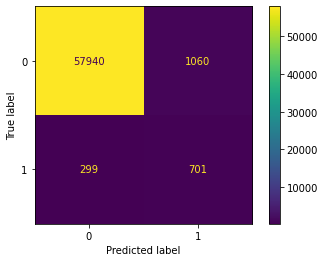

In [128]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(Y, kmeans_pca.labels_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

## PCA with 35 components

In [129]:

pca_35 = PCA(n_components = 35)
pca_35.fit(X)

Xpca = pca_35.transform(X)
print(Xpca.shape)

(60000, 35)


In [ ]:
stock_silhouette_kmeans = []

for K in np.arange(2,11):
    print('processing number of clusters K =', K)
    # Kmeans : 
    kmeans_pca = KMeans(n_clusters = K, init = 'k-means++', random_state = 10)
    kmeans_pca.fit(Xpca)
    stock_silhouette_kmeans.append(silhouette_score(Xpca, kmeans_pca.labels_))

    
figSilhouette = plt.figure(figsize=(8,4))
ax1 = figSilhouette.add_subplot(1,1,1)
ax1.plot(np.arange(2,11),stock_silhouette_kmeans, marker='o', ls='--', lw=2, label='PCA-Kmeans')
ax1.set_xlabel("Number of clusters $K$",fontsize=20)
ax1.set_ylabel("Silhouette Coefficient",fontsize=20)
ax1.set_title("Silhouette versus $K$",fontsize=20)
ax1.tick_params(axis='x', labelsize=18)
ax1.tick_params(axis='y', labelsize=18)
ax1.grid()
ax1.legend(fontsize=18, bbox_to_anchor=(1.1, 1.05))



In [132]:
Y = Y.ravel()

In [133]:
Y.shape

(60000,)

### Logistic Regression

In [134]:
scaler = preprocessing.StandardScaler().fit(X)
X_test = scaler.transform(X_test)


X_test_pca = pca_35.transform(X_test)

In [135]:
LR = LogisticRegression(max_iter = 10000).fit(Xpca,Y)

In [136]:
LR.score(Xpca, Y)

0.9893833333333333

In [137]:
Y_test = Y_test.ravel()

In [138]:
LR.score(X_test_pca, Y_test)


0.23375

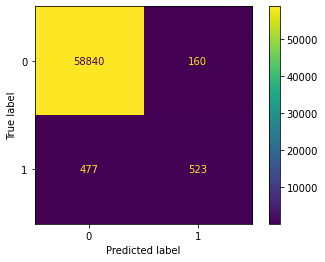

In [139]:
cm = confusion_matrix(Y, LR.predict(Xpca), labels=LR.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

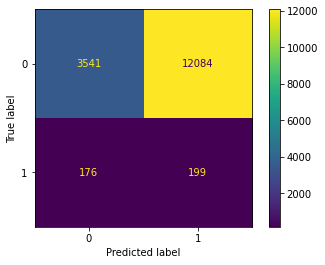

In [140]:
cm = confusion_matrix(Y_test, LR.predict(X_test_pca), labels=LR.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [141]:
np.count_nonzero(Y_test == 1)

375

In [142]:
np.count_nonzero(Y_test == 0)

15625

Issue ==> imbalanced classes

In [143]:
#Reweight Logistic Regression
LR = LogisticRegression(class_weight='auto',max_iter = 10000).fit(Xpca,Y)

In [144]:
LR.score(Xpca, Y)

0.9893833333333333

In [145]:
LR.score(X_test_pca, Y_test)

0.23375

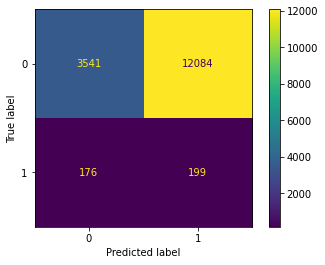

In [146]:
cm = confusion_matrix(Y_test, LR.predict(X_test_pca), labels=LR.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

### LDA

In [147]:

LDA = LinearDiscriminantAnalysis().fit(Xpca, Y)


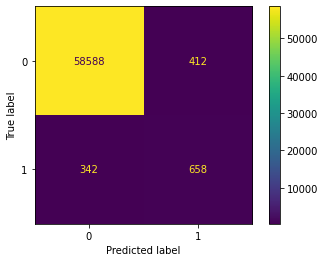

In [148]:
cm = confusion_matrix(Y, LDA.predict(Xpca), labels=LDA.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

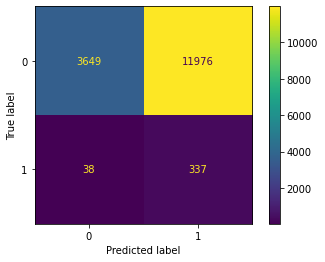

In [149]:
cm = confusion_matrix(Y_test, LDA.predict(X_test_pca), labels=LDA.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

### Oversampling

In [150]:
sm = SMOTE()
X_res, y_res = sm.fit_resample(Xpca, Y)

In [151]:
np.bincount(Y)

array([59000,  1000])

In [152]:
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 59000, 1: 59000})


In [153]:
X_res.shape

(118000, 35)

In [154]:
LR = LogisticRegression(max_iter = 10000).fit(X_res, y_res)

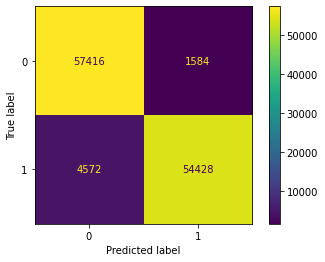

In [155]:
cm = confusion_matrix(y_res, LR.predict(X_res), labels=LR.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

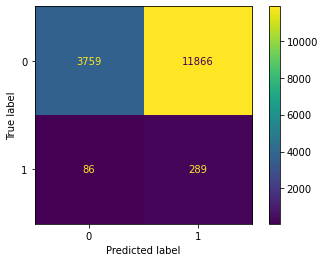

In [156]:
cm = confusion_matrix(Y_test, LR.predict(X_test_pca), labels=LR.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [157]:
LR.score(X_test_pca, Y_test)

0.253

### Random Forest

In [158]:
clf = RandomForestClassifier(max_depth=20, random_state=0)
clf.fit(Xpca,Y)

RandomForestClassifier(max_depth=20, random_state=0)

In [159]:
clf.score(Xpca, Y)

0.9995

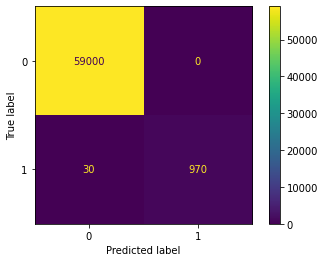

In [160]:
cm = confusion_matrix(Y, clf.predict(Xpca), labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

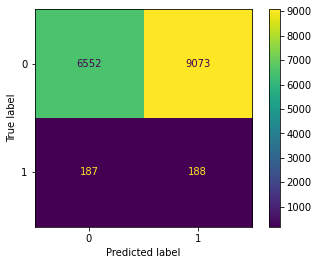

In [161]:
cm = confusion_matrix(Y_test, clf.predict(X_test_pca), labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [162]:
clf = RandomForestClassifier(max_depth=15, random_state=0)
clf.fit(Xpca,Y)

RandomForestClassifier(max_depth=15, random_state=0)

In [163]:
clf.score(Xpca, Y)

0.9986666666666667

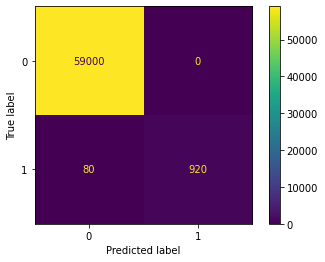

In [164]:
cm = confusion_matrix(Y, clf.predict(Xpca), labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

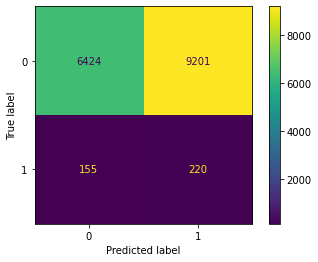

In [165]:
cm = confusion_matrix(Y_test, clf.predict(X_test_pca), labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()